## Decision Tree Parameters <br>
min_samples_split 
- 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는 데 사용됨
- 디폴트는 2이고 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
- 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가

min_sample_leaf
- 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
- Min_samples_split과 유사하게 과적합 제어 용도, 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요

max_features
- 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
- int 형으로 지정하면 대상 피처의 개수. float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
- 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수)
- 'auto'로 지정하면 sqrt와 동일
- 'log'는 전체 피처 중 log2(전체 피처 개수) 선정
- 'None'은 전체 피처 선정

max_depth
- 트리의 최대 깊이를 규정
- 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드를 가지는 데이터 개수가 min_samples_split보다 작아질 때까지 계속 깊이를 증가시킴
- 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요

max_leaf_nodes
- 말단 노드(Leaf)의 최대 개수
                  

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 모두 디폴트 하이퍼 파라미터
dt_clf = DecisionTreeClassifier(random_state=156)

iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

In [16]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### 시각화된 도표
- petal length(cm) <= 2.45와 같은 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙조건이다. 이 조건이 없으면 리프 노드이다.
- gini는 다음의 value=[]로 주어진 데이터 분포에서의 지니 계수이다. (지니계수가 낮을수록 데이터의 균일도가 높은 것으로 해석)
- value = []는 클래스 값 기반의 데이터 건수이다. 붓꽃 데이터 세트는 클래스 값으로 0, 1, 2를 가지고 있으며, 0 : Setosa, 1 : Versicolor, 2 : Virginica 품종을 가리킨다. 만일 value=[41, 40, 39]라면 클래스 값의 순서로 Setosa 41개, Vesicolor 40개, Virginica 39개로 데이터가 구성되어 있다는 것임

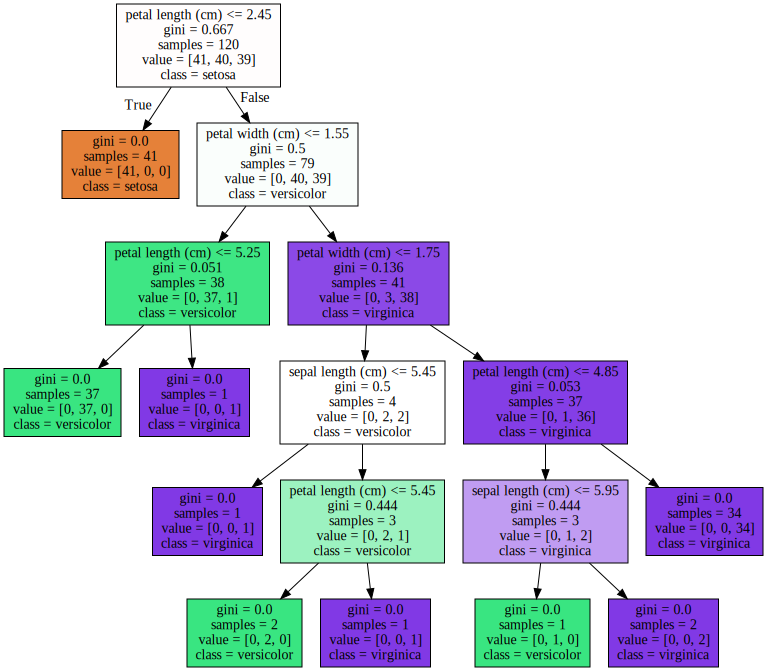

In [17]:
import graphviz

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

In [18]:
# max_depth를 3으로 조정
dt_clf = DecisionTreeClassifier(max_depth=3, random_state=156)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=156, splitter='best')

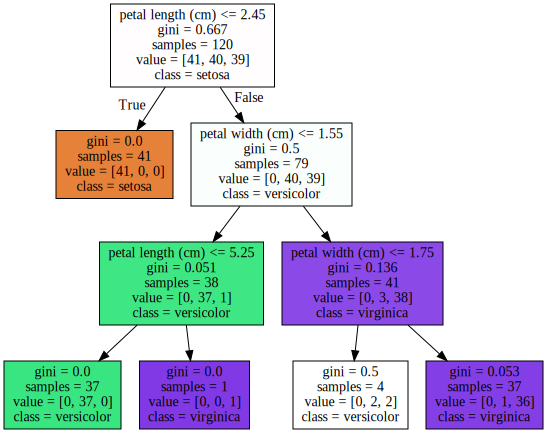

In [19]:
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

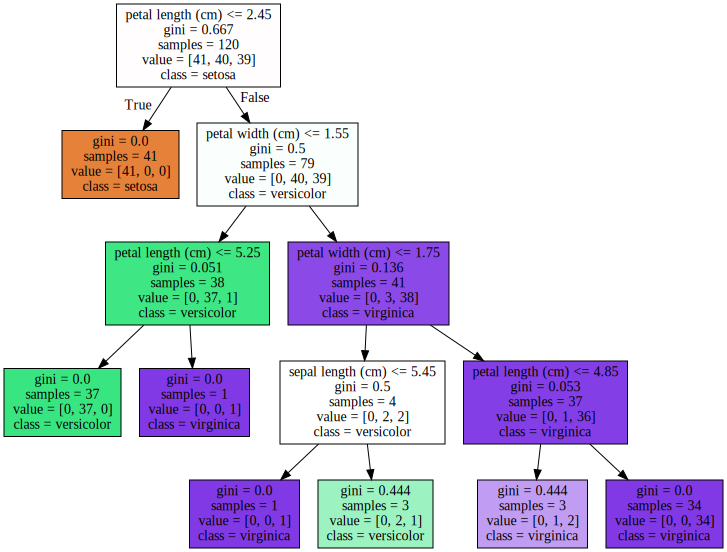

In [20]:
# min_samples_split을 4로 지정
dt_clf = DecisionTreeClassifier(min_samples_split=4, random_state=156)

dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

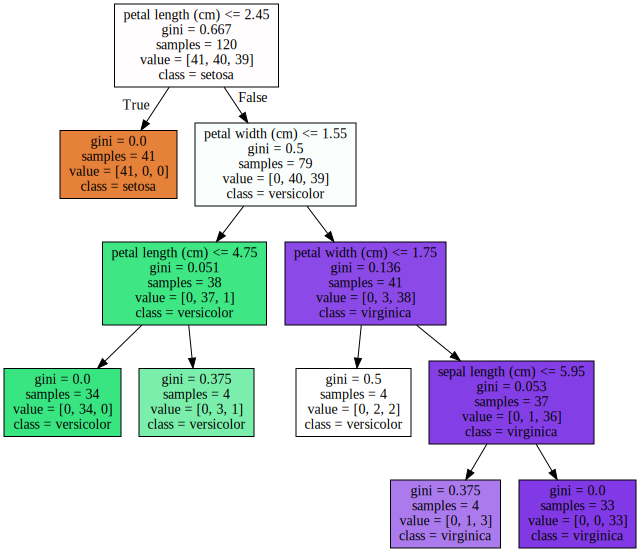

In [21]:
# min_samples_leaf를 4로 지정
dt_clf = DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

dt_clf.fit(X_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names,
                feature_names = iris_data.feature_names, impurity=True, filled=True)

with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

피처 중요도 시각화

feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm) : 0.006
sepal width (cm) : 0.000
petal length (cm) : 0.546
petal width (cm) : 0.448


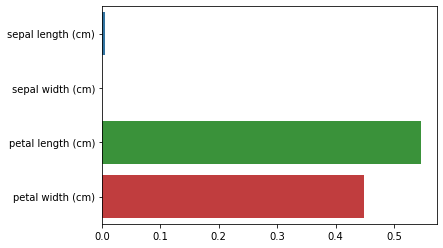

In [22]:
import seaborn as sns 
import numpy as np

print("feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0} : {1:.3f}'.format(name, value))

sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

데이터셋 생성

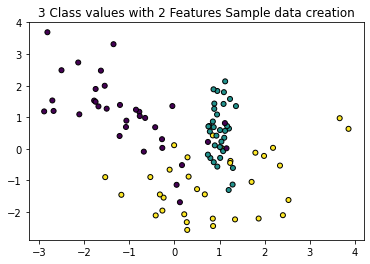

In [23]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample data creation")

X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')

결정 트리가 분류한 영역 시각화 코드
https://github.com/chulminkw/PerfectGuide/blob/master/4%EC%9E%A5/4.2%20%EA%B2%B0%EC%A0%95%20%ED%8A%B8%EB%A6%AC_Ver01.ipynb 에서 원본 코드를 확인할 수 있다.

In [0]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1) 

하이퍼 파리미터를 조정하지 않은 결정 트리 영역

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


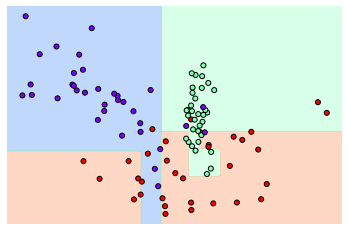

In [25]:
visualize_boundary(dt_clf, X_features, y_labels)

min_samples_leaf=6으로 조정한 결정 트리 영역

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


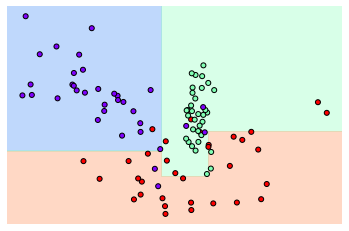

In [26]:
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)

visualize_boundary(dt_clf, X_features, y_labels)